In [2]:
%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())       

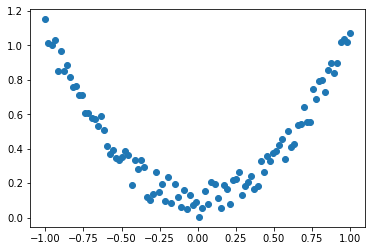

In [3]:
plt.scatter(x.numpy(), y.numpy())

## 搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
 

    def forward(self, x):

        return x

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


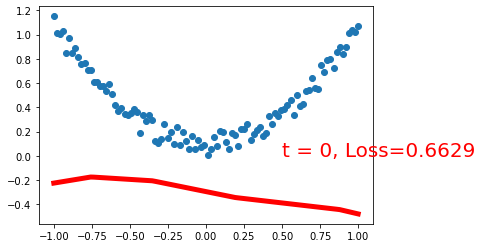

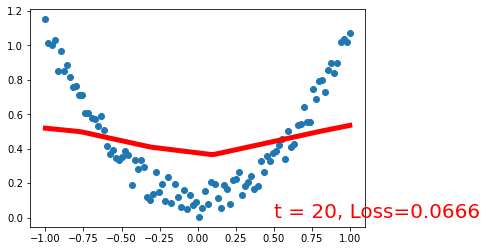

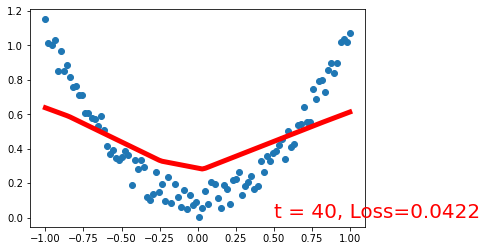

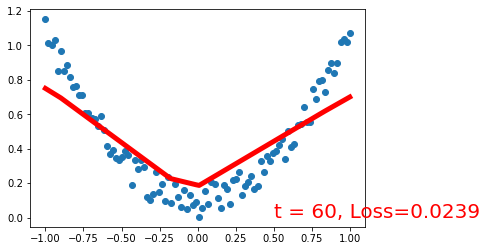

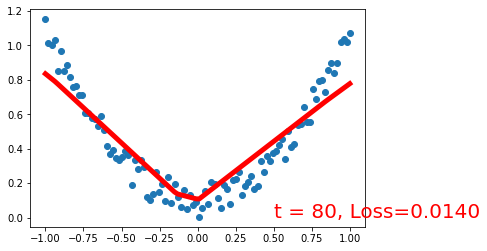

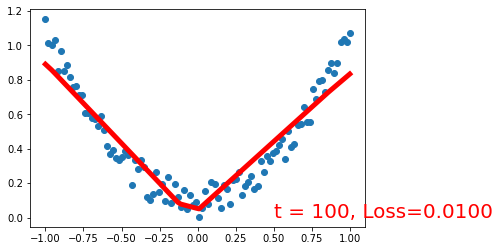

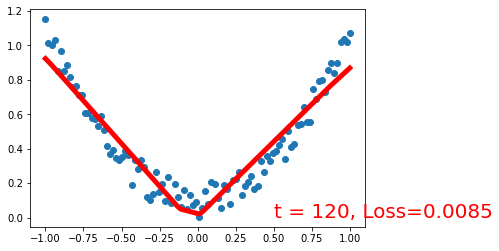

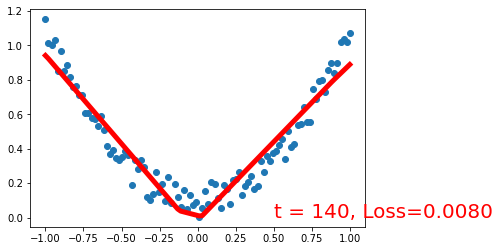

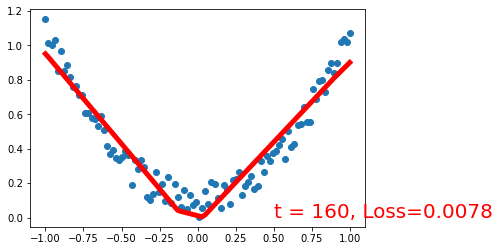

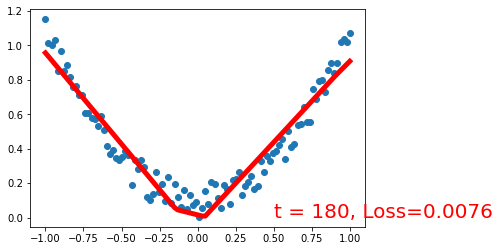

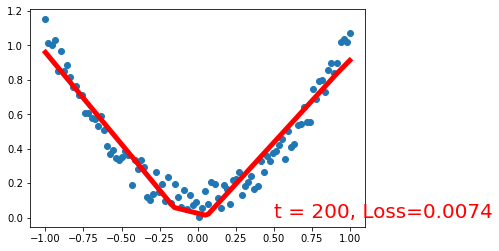

In [4]:
net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(201):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()
# plt.show()